In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_scaling_lines
import ast
import matplotlib.pyplot as plt

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT_1+6', 'IT_2+6', 'IT_3+6', 'IT_4+6']
# methods = ['ECMP_ASP', 'ECMP_APST4',e 'OPT', 'MP_ASP', 'MP_APST4', 'IT_1+6', 'IT_2+6', 'IT_3+6', 'IT_4+6'] # TODO

In [3]:
# the key of each file:
# OPT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_OPT,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# MP: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_MP_ASP,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# IT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_IT,Phi_NEXU[Gbps],method1_times[s],method1_peak_RAMs[MB],method1_results[Gbps],method2_time[s],method2_attempts,method2_peak_RAM[MB]


In [4]:
# calculate time for each method:
raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] # did not count the init time
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] # did not count the init time
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] # did not count the init time
raw_data['IT_1+6']['_time'] = raw_data['IT_1+6']['method2_time[s]'] + raw_data['IT_1+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_2+6']['_time'] = raw_data['IT_2+6']['method2_time[s]'] + raw_data['IT_2+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_3+6']['_time'] = raw_data['IT_3+6']['method2_time[s]'] + raw_data['IT_3+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_4+6']['_time'] = raw_data['IT_4+6']['method2_time[s]'] + raw_data['IT_4+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

In [5]:
def plot_for_traffic(traffic_pattern, _methods, _x_power:int = 1):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={method: [] for method in _methods}
    for method in _methods:
        for v in _V:
            _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
            if len(_values):
                plot_data[method].append( _values[0] )
    plot_scaling_lines(_V, plot_data, "scaling of Nexullance methods with "+traffic_pattern, "V^"+ r"$\bf{" + str(_x_power) + "}$", "execution time (s)", False, _x_power)

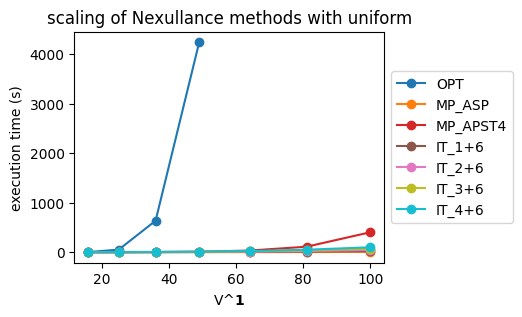

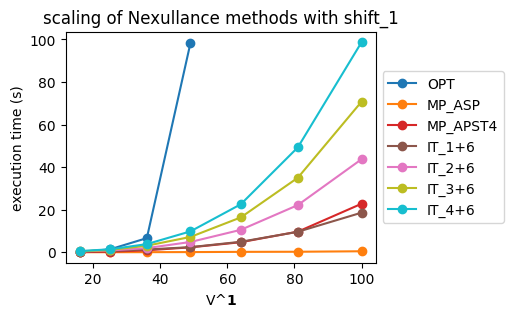

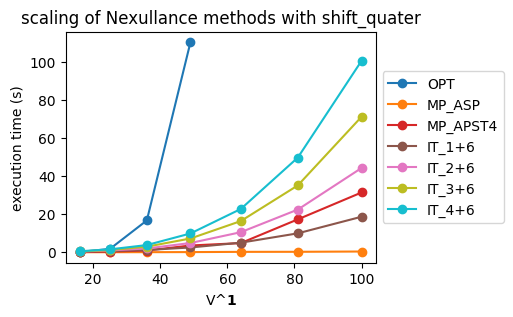

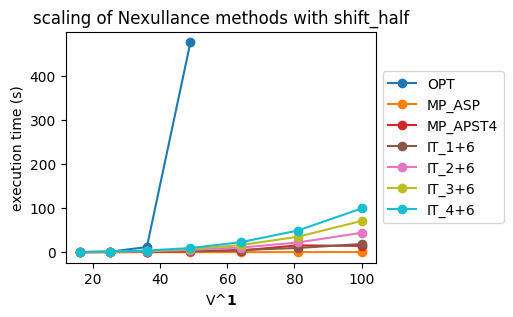

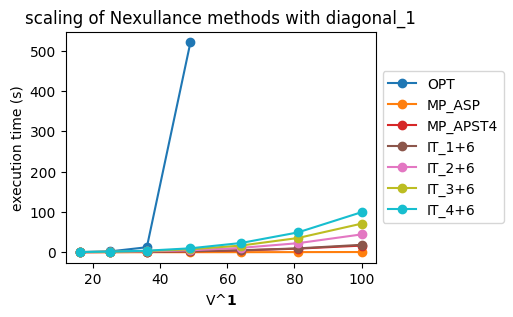

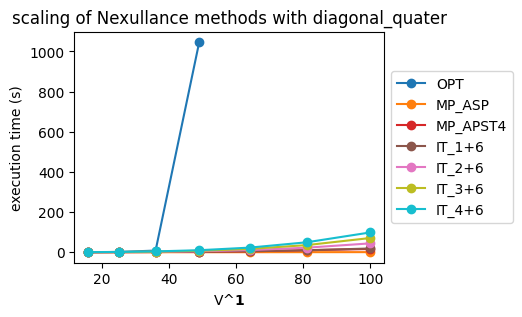

In [6]:
plot_for_traffic("uniform", methods)
plt.show()
plot_for_traffic("shift_1", methods)
plt.show()
plot_for_traffic("shift_quater", methods)
plt.show()
plot_for_traffic("shift_half", methods)
plt.show()
plot_for_traffic("diagonal_1", methods)
plt.show()
plot_for_traffic("diagonal_quater", methods)
plt.show()

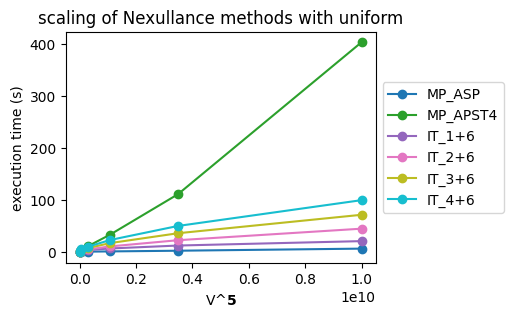

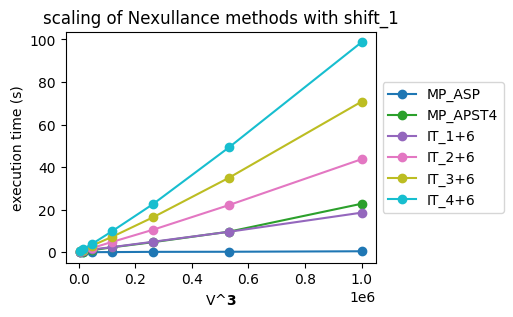

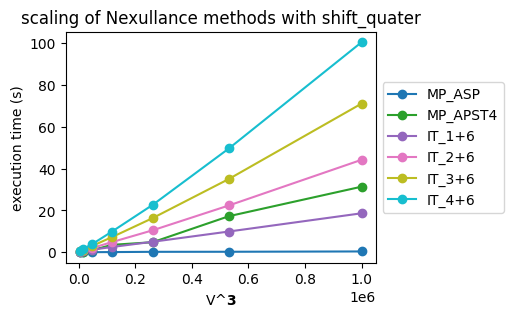

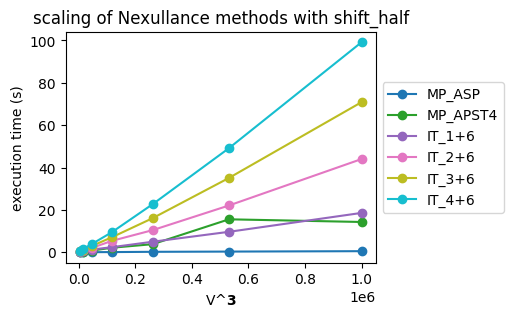

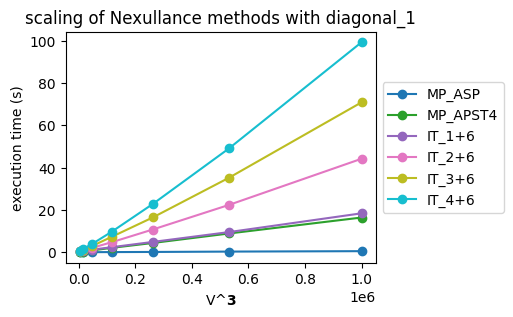

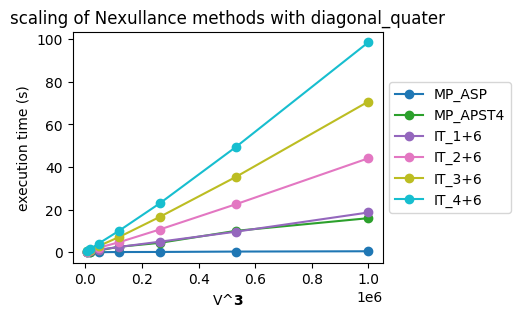

In [7]:
methods_without_OPT = [x for x in methods if x != 'OPT']
plot_for_traffic("uniform", methods_without_OPT, 5)
plt.show()
plot_for_traffic("shift_1", methods_without_OPT, 3)
plt.show()
plot_for_traffic("shift_quater", methods_without_OPT, 3)
plt.show()
plot_for_traffic("shift_half", methods_without_OPT, 3)
plt.show()
plot_for_traffic("diagonal_1", methods_without_OPT, 3)
plt.show()
plot_for_traffic("diagonal_quater", methods_without_OPT, 3)
plt.show()

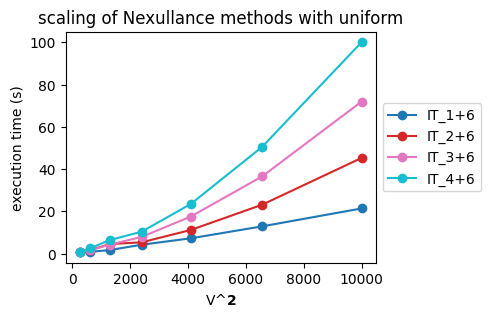

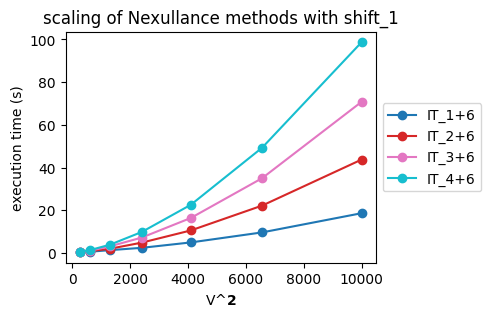

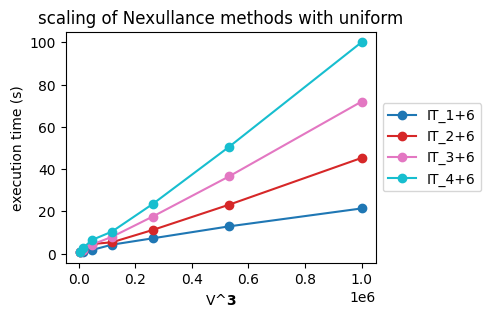

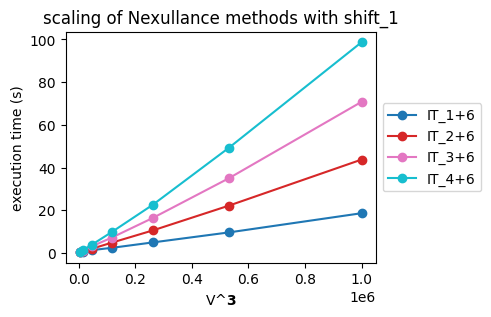

In [8]:
methods_IT = [x for x in methods if x not in ['OPT', 'MP_APST4', 'MP_ASP']]
plot_for_traffic("uniform", methods_IT,3)
plt.show()
plot_for_traffic("shift_1", methods_IT,3)
plt.show()

# now include init time

In [9]:
# calculate time for each method, including init, 
# the result shows that the trend is the same

raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
raw_data['IT_1+6']['_time'] = raw_data['IT_1+6']['method2_time[s]'] 
raw_data['IT_2+6']['_time'] = raw_data['IT_2+6']['method2_time[s]'] 
raw_data['IT_3+6']['_time'] = raw_data['IT_3+6']['method2_time[s]'] 
raw_data['IT_4+6']['_time'] = raw_data['IT_4+6']['method2_time[s]'] 

In [10]:
# # calculate time for each method, including init, 
# # the result shows that the trend is the same

# raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
# raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
# raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
# raw_data['IT_1+6']['_time'] = raw_data['IT_1+6']['method2_time[s]'] + raw_data['IT_1+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
# raw_data['IT_2+6']['_time'] = raw_data['IT_2+6']['method2_time[s]'] + raw_data['IT_2+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
# raw_data['IT_3+6']['_time'] = raw_data['IT_3+6']['method2_time[s]'] + raw_data['IT_3+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
# raw_data['IT_4+6']['_time'] = raw_data['IT_4+6']['method2_time[s]'] + raw_data['IT_4+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

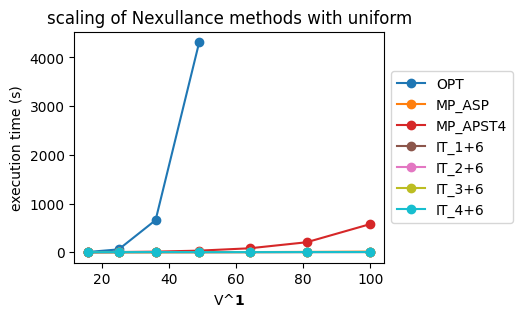

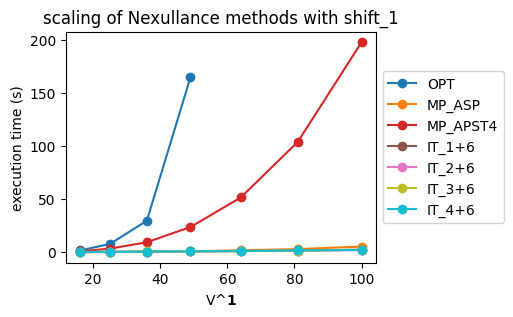

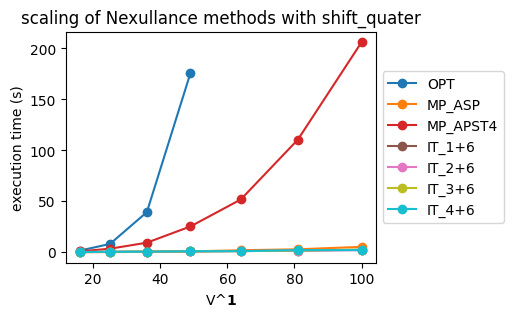

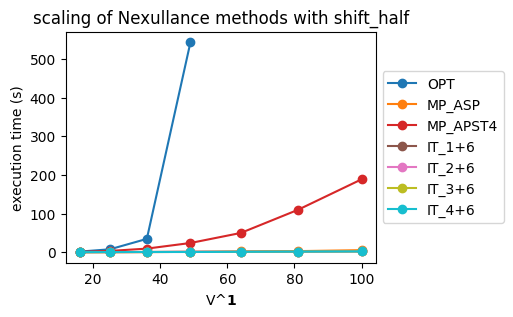

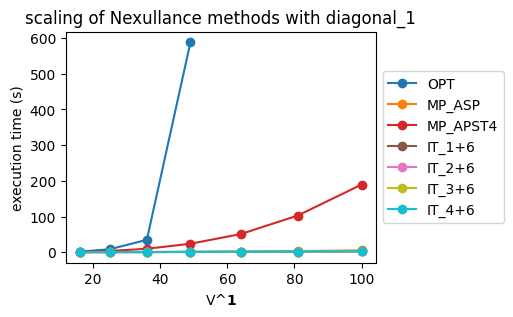

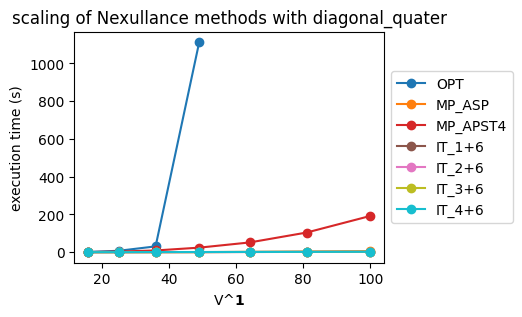

In [11]:
plot_for_traffic("uniform", methods)
plt.show()
plot_for_traffic("shift_1", methods)
plt.show()
plot_for_traffic("shift_quater", methods)
plt.show()
plot_for_traffic("shift_half", methods)
plt.show()
plot_for_traffic("diagonal_1", methods)
plt.show()
plot_for_traffic("diagonal_quater", methods)
plt.show()

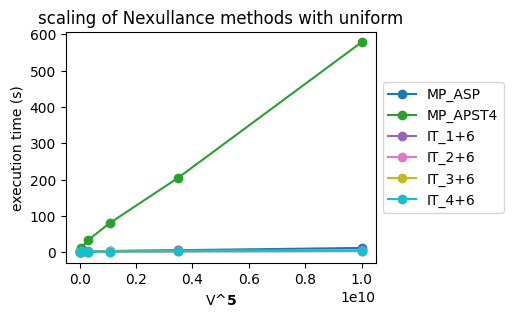

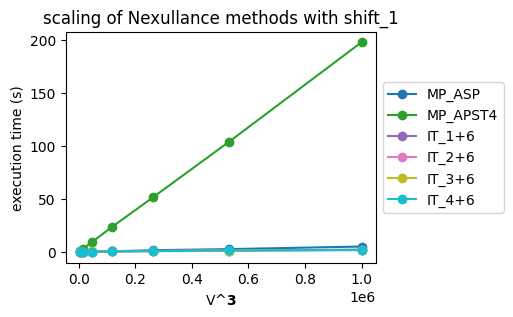

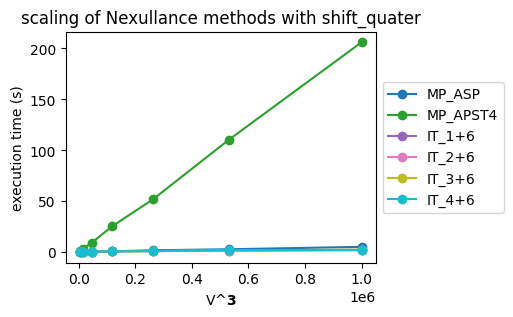

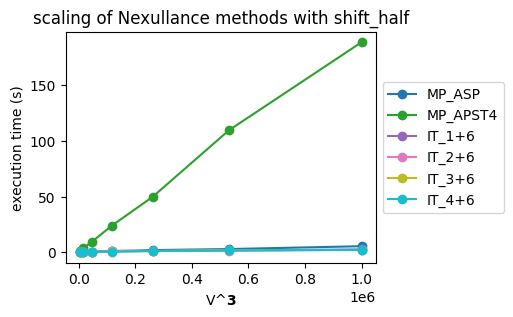

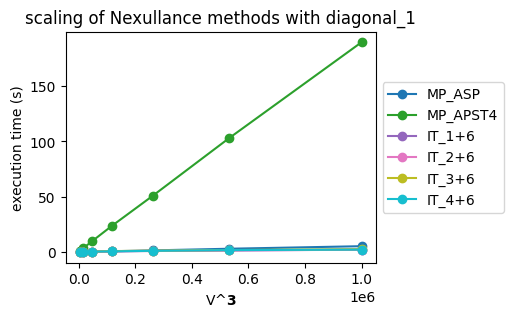

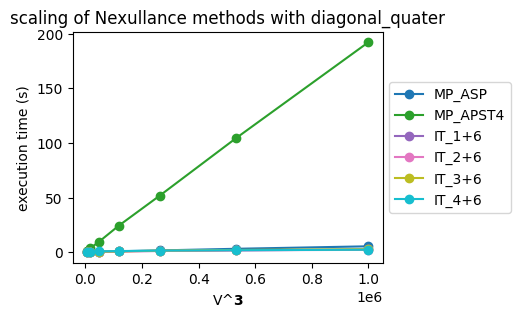

In [12]:
methods_without_OPT = [x for x in methods if x != 'OPT']
plot_for_traffic("uniform", methods_without_OPT, 5)
plt.show()
plot_for_traffic("shift_1", methods_without_OPT, 3)
plt.show()
plot_for_traffic("shift_quater", methods_without_OPT, 3)
plt.show()
plot_for_traffic("shift_half", methods_without_OPT, 3)
plt.show()
plot_for_traffic("diagonal_1", methods_without_OPT, 3)
plt.show()
plot_for_traffic("diagonal_quater", methods_without_OPT, 3)
plt.show()

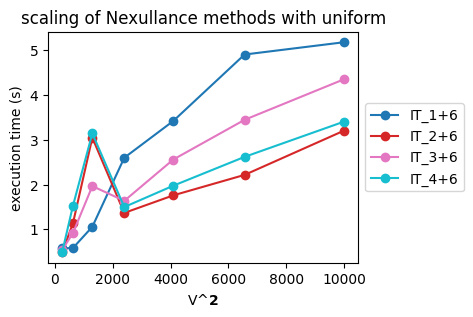

In [13]:
# only method 2
methods_IT = [x for x in methods if x not in ['OPT', 'MP_APST4', 'MP_ASP']]
plot_for_traffic("uniform", methods_IT,2)
plt.show()

In [14]:
# method_2 along scales ~ in between V^1 and V^2) 